In [1]:
# Importing and setting up
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # additional plotting tools
from sosp import simple

In [2]:
# Verb choice: settle on a noun-verb link -> number marking
centers = np.array([[1, 0], [0, 1.]]) # N1-V, N2-V
cond_names = ['container_long', 'collection_long', 'measure_long', 'quant_long',
              'container_short', 'collection_short', 'measure_short', 'quant_short']
#ml = 0.8  # 0.8 used for EI, but not needed here
gamma = 0.2  # 0.4 = default

## Features
Noun, container, spatial config., prohib. abstract N2, present

| Word | Noun | container | spatial config. | prohib. abstract N2 | present |
| - | - | - | - | - | - |
| Container | 1 | 1 | 1 | 1 | 1 |
| Collection | 1 | 0 | 1 | 1 | 1 |
| Measure | 1 | 0 | 0 | 0 | 1 |
| Quant | 0 | 0 | 0 | 0 | 1 |
| N2 | 1 | 1 | 1 | 0 (1) | 1/0 |
| Verb's subject attch. site | 1 | 1 | 1 | 1 | 1 |

In [3]:
fm = 0.2  # cost per missing feature
# Making N2 not quite perfect; excellent fit to the data
cond_harmonies = np.array([[1, 1-fm],
                           [1-fm, 1-fm],
                           [1-fm*3, 1-fm],
                           [1-fm*4, 1-fm],
                           [1, 1-fm*2],
                           [1-fm, 1-fm*2],
                           [1-fm*3, 1-fm*2],
                           [1-fm*4, 1-fm*2]])

# Making N2 a perfect match all the time; good, but not great fit to data
#cond_harmonies = np.array([[1, 1],
#                           [1-fm, 1],
#                           [1-fm*3, 1],
#                           [1-fm*4, 1],
#                           [1, 1-fm],
#                           [1-fm, 1-fm],
#                           [1-fm*3, 1-fm],
#                           [1-fm*4, 1-fm]])

cond_harmonies

array([[1. , 0.8],
       [0.8, 0.8],
       [0.4, 0.8],
       [0.2, 0.8],
       [1. , 0.6],
       [0.8, 0.6],
       [0.4, 0.6],
       [0.2, 0.6]])

In [33]:
xinit = np.zeros(centers.shape[1])
sys = simple.SimpleModel(corpus_filename=None, centers=centers, local_harmonies=np.array([0, 0]),
                         stopping_crit='cheb_stop')
sys.set_gamma(gamma)
sys.set_noise_mag(0.0005)
sys.locate_attrs()

Found 2 unique attractors from 2 centers


In [34]:
for c in range(cond_harmonies.shape[0]):
    sys.set_local_harmonies(cond_harmonies[c,])
    sys.locate_attrs()

Found 2 unique attractors from 2 centers
Found 2 unique attractors from 2 centers
Found 2 unique attractors from 2 centers
Found 1 unique attractors from 2 centers
Found 2 unique attractors from 2 centers
Found 2 unique attractors from 2 centers
Found 2 unique attractors from 2 centers
Found 1 unique attractors from 2 centers


In [35]:
data = sys.run_multiple_conditions(n_runs=2000, conditions=cond_harmonies)
# Error in line 130 of simple.py: 'Length of values does not match length of index'; seems to be noise-related

Found 2 unique attractors from 2 centers
Condition 0
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] [1000] [1100] [1200] [1300] [1400] [1500] [1600] [1700] [1800] [1900] Found 2 unique attractors from 2 centers
Condition 1
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] [1000] [1100] [1200] [1300] [1400] [1500] [1600] [1700] [1800] [1900] Found 2 unique attractors from 2 centers
Condition 2
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] [1000] [1100] [1200] [1300] [1400] [1500] [1600] [1700] [1800] [1900] Found 1 unique attractors from 2 centers
Condition 3
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] [1000] [1100] [1200] [1300] [1400] [1500] [1600] [1700] [1800] [1900] Found 2 unique attractors from 2 centers
Condition 4
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] [1000] [1100] [1200] [1300] [1400] [1500] [1600] [1700] [1800] [1900] Found 2 unique attractors from 2 ce

In [36]:
cond_dict = {i: n for i, n in zip(range(len(cond_names)), cond_names)}
data['Condition'] = data.Condition.map(cond_dict)
print(data.groupby(['Condition', 'CenterNr']).agg(['mean', 'std', 'count']))
print(data.groupby(['Condition']).Time.agg(['mean', 'std']))

                                 Time                 
                                 mean        std count
Condition        CenterNr                             
collection_long  0         279.549900  46.387005  1002
                 1         279.383768  43.079177   998
collection_short 0         288.978803  53.912786  1604
                 1         344.722222  53.077289   396
container_long   0         231.914033  37.231113  1582
                 1         270.162679  39.882529   418
container_short  0         235.671376  43.455650  1911
                 1         335.853933  46.180858    89
measure_long     0         466.305085  77.451042    59
                 1         295.083462  60.175142  1941
measure_short    0         495.989130  87.270425   276
                 1         383.436775  79.832297  1724
quant_long       0         999.000000   0.000000     3
                 1         290.916875  59.648999  1997
quant_short      0         999.000000   0.000000    16
          

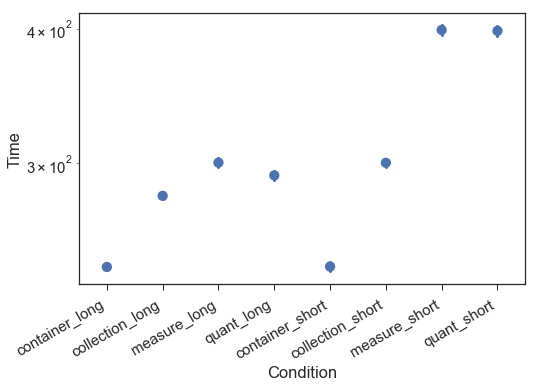

In [37]:
plt.subplots(figsize=(8, 5))
fig = sns.pointplot(x='Condition', y='Time', data=data, ci=95, linestyles='')
fig.set_xticklabels(fig.get_xticklabels(), rotation=30, ha='right')
fig.set_yscale('log')
plt.show()

In [38]:
def split_short(row):
    if 'short' in row['Condition']:
        return '-N2'
    elif 'long' in row['Condition']:
        return '+N2'


def split_n1(row):
    if 'cont' in row['Condition']:
        return 'Cont.'
    elif 'coll' in row['Condition']:
        return 'Coll.'
    elif 'meas' in row['Condition']:
        return 'Meas.'
    elif 'quant' in row['Condition']:
        return 'Quant.'

In [39]:
data['N2Presence'] = data.apply(lambda row: split_short(row), axis=1)
data['N1Type'] = data.apply(lambda row: split_n1(row), axis=1)

In [40]:
data.head()

,CenterNr,Time,Condition,N2Presence,N1Type
0,0,200,container_long,+N2,Cont.
0,0,229,container_long,+N2,Cont.
0,0,287,container_long,+N2,Cont.
0,0,214,container_long,+N2,Cont.
0,0,280,container_long,+N2,Cont.


<Figure size 432x288 with 0 Axes>

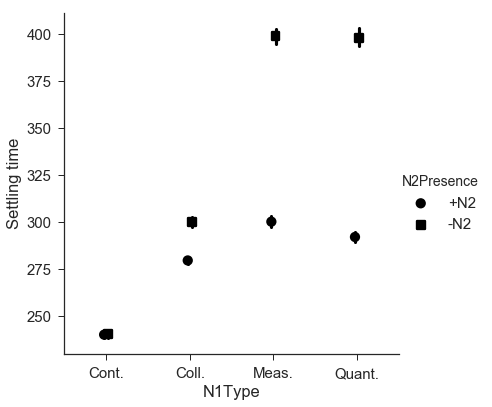

In [61]:
sns.set(font_scale=1.5)
sns.set_style('ticks')
sns.despine()
g = sns.factorplot(x="N1Type", y="Time", hue="N2Presence", data=data, kind="point", linestyles='', dodge=True,
                   size=6, legend_out=True, markers=['o', 's'], palette={"+N2": "k", "-N2": "k"})
plt.ylabel('Settling time')
plt.show()

In [62]:
g.savefig('PsPartSimpleRTs02.pdf')

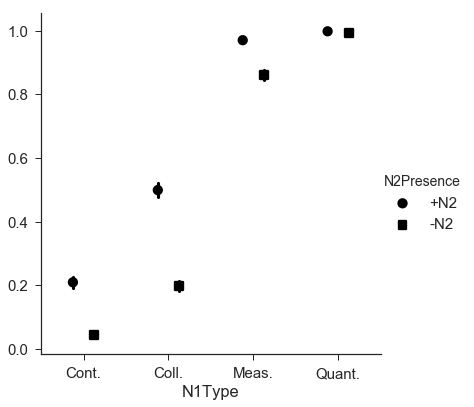

In [64]:
g2 = sns.factorplot(x="N1Type", y="CenterNr", hue="N2Presence", data=data, kind="point", linestyles='',
                    dodge=0.25, size=6, markers=['o', 's'], palette={"+N2": "k", "-N2": "k"}, legend_out=True)
#plt.legend(loc='right')
plt.ylabel('')
plt.show()

In [65]:
g2.savefig('PsPartSimpleProps02.pdf')

In [55]:
cond_harmonies

array([[1. , 0.8],
       [0.8, 0.8],
       [0.4, 0.8],
       [0.2, 0.8],
       [1. , 0.6],
       [0.8, 0.6],
       [0.4, 0.6],
       [0.2, 0.6]])

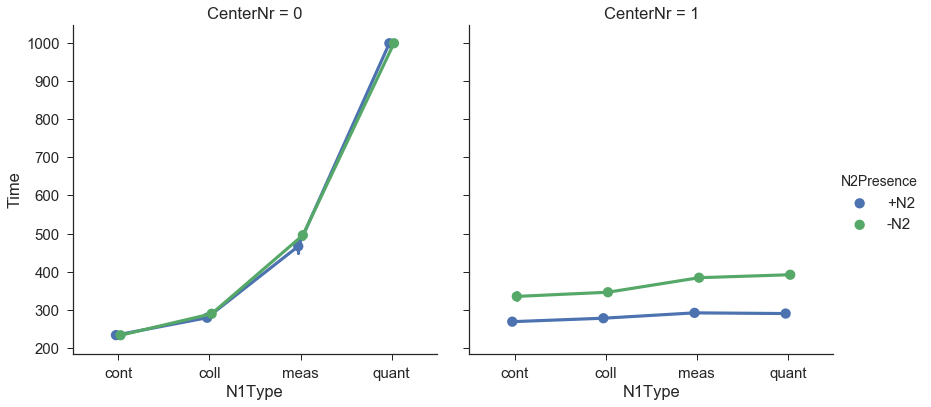

In [112]:
g3 = sns.factorplot(x="N1Type", y="Time", hue="N2Presence", col='CenterNr', data=data, kind="point", dodge=True,
                   size=3.5, sharey=True)

In [82]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm=ols('Time ~ 1 + C(N2Presence, Sum) * C(N1Type, Sum)', data=data).fit()
#print(sm.stats.anova_lm(lm, typ=3))
print(lm.summary())

/Users/garrettsmith/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     1632.
Date:                Sat, 23 Jun 2018   Prob (F-statistic):               0.00
Time:                        17:44:43   Log-Likelihood:                -90297.
No. Observations:               16000   AIC:                         1.806e+05
Df Residuals:                   15992   BIC:                         1.807e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [113]:
data.groupby(['N2Presence', 'N1Type']).describe()

CenterNr                                               Time  \
                     count    mean       std  min  25%  50%  75%  max   count   
N2Presence N1Type                                                               
+N2        coll     2000.0  0.5045  0.500105  0.0  0.0  1.0  1.0  1.0  2000.0   
           cont     2000.0  0.2215  0.415360  0.0  0.0  0.0  0.0  1.0  2000.0   
           meas     2000.0  0.9655  0.182555  0.0  1.0  1.0  1.0  1.0  2000.0   
           quant    2000.0  0.9995  0.022361  0.0  1.0  1.0  1.0  1.0  2000.0   
-N2        coll     2000.0  0.2000  0.400100  0.0  0.0  0.0  0.0  1.0  2000.0   
           cont     2000.0  0.0470  0.211692  0.0  0.0  0.0  0.0  1.0  2000.0   
           meas     2000.0  0.8530  0.354194  0.0  1.0  1.0  1.0  1.0  2000.0   
           quant    2000.0  0.9950  0.070551  0.0  1.0  1.0  1.0  1.0  2000.0   

                                                                              
                       mean         std    min     25%    50%     75%    max  
N2Presence N1Type                                                             
+N2        coll    278.8775   45.356765  159.0  246.00  271.0  306.00  483.0  
           cont    241.7740   42.248022  146.0  212.00  237.0  267.00  522.0  
           meas    298.3105   67.831937  181.0  252.00  284.0  327.00  738.0  
           quant   290.8455   61.497867  179.0  249.00  281.0  319.00  999.0  
-N2        coll    301.2305   58.924413  173.0  257.00  292.5  337.25  612.0  
           cont    238.4210   47.249434  142.0  205.00  229.0  261.25  557.0  
           meas    400.7835   90.878535  220.0  334.75  383.0  449.00  938.0  
           quant   395.2725  105.841483  217.0  326.00  373.0  436.00  999.0